Importing libaries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Model

In [5]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

visualization and preforming prediction on single image

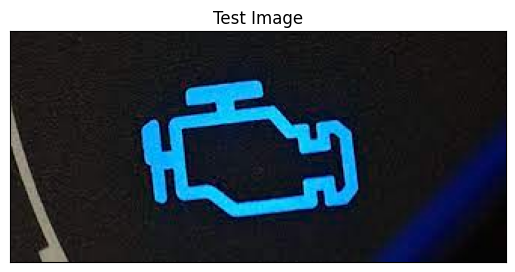

In [7]:
import cv2
image_path = "/content/drive/MyDrive/Dashboard_indicators/Testing/Check Engine Light/ce5.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing model

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Converting single image to batch
prediction = cnn.predict(input_arr)


1/1 [==============================] - 0s 331ms/step


In [9]:
print(prediction[0])
print(max(prediction[0]))

[1.77488571e-19 9.05750291e-24 4.63756443e-26 2.07512975e-20
 4.63311124e-25 1.59408555e-24 1.81528096e-24 1.00000000e+00
 1.00845485e-22 2.37019865e-27 2.85520233e-19 1.20733623e-28
 1.38795905e-24 2.57178886e-25 5.46258157e-23 3.18406472e-20
 6.61772640e-29 5.73727799e-18 3.19949060e-28 2.18551094e-21
 1.97413388e-23 2.62918324e-18 3.03535501e-23 3.43216210e-19
 1.44453636e-26 3.45367919e-24 1.04340976e-26 6.49307296e-21
 2.08664670e-21]
1.0


In [12]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dashboard_indicators/Testing',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode='rgb',
    batch_size =32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 55 files belonging to 29 classes.


In [ ]:
#test_set.class_names

In [13]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index[0][0])

7


Dispay image

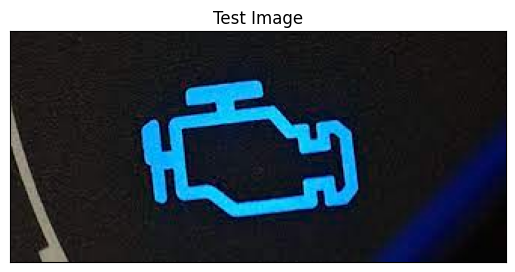

In [14]:
import cv2
image_path = "/content/drive/MyDrive/Dashboard_indicators/Testing/Check Engine Light/ce5.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a Check Engine Light
